In [16]:
import ast
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Bivariate Exploratory Data Analysis for Challenge 2 - Seasonality

In [2]:
df = pd.read_csv("data/clean/EN_questions.csv")
df_ke = pd.read_csv("data/clean/ke_EN_questions.csv")
df_ug = pd.read_csv("data/clean/ug_EN_questions.csv")

In [3]:
df.head()

,question_id,user_id,country,topics,question_type,text,clean_text,date,season
0,3849084,6642,ke,"('rabbit',)",pests_diseases,Q-i have stock rabbit's urine for 5 weeks mash...,qi have stock rabbits urine for weeks mashamba...,2017-11-22 12:25:10+00:00,short_rains
1,3849098,526375,ug,"('poultry',)",soil_fertility,Q J Have Mi 10000 Can J Start Aproject Of Pout...,q j have mi can j start aproject of poutry how...,2017-11-22 12:25:12+00:00,planting
2,3849100,237506,ke,"('pig', 'coconut')",planting,WHERE DO I GET SEEDS OF COCONUT?,where do i get seeds of coconut,2017-11-22 12:25:12+00:00,short_rains
3,3849129,54426,ke,"('plant',)",planting,Q#.Which plant has omega3?,qwhich plant has omega,2017-11-22 12:25:16+00:00,short_rains
4,3849153,340091,ug,"('tomato',)",planting,Q Am Jackson From Ibanda If Want To Grow Tomat...,q am jackson from ibanda if want to grow tomat...,2017-11-22 12:25:18+00:00,planting


## Question Types per Season

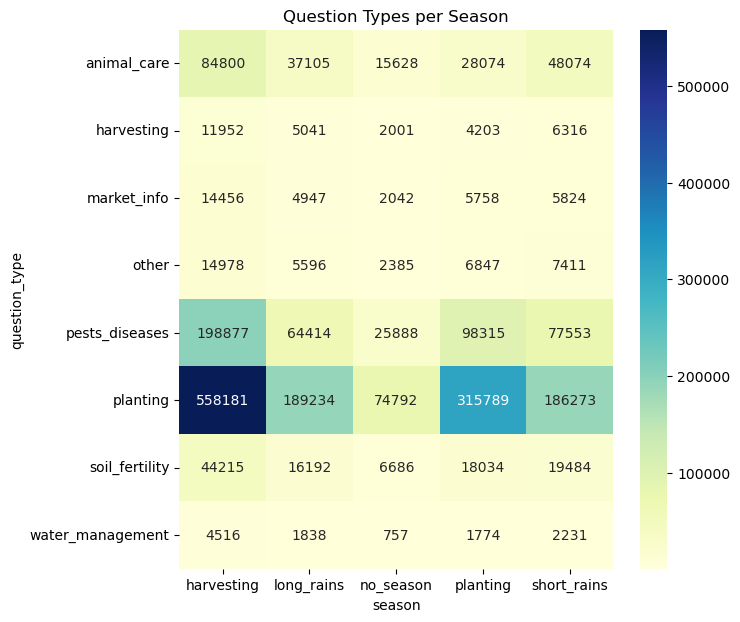

In [4]:
crosstab_result = pd.crosstab(df['question_type'], df['season'])

plt.figure(figsize=(7, 7))
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Question Types per Season")
plt.show()

## Question Types per Season - Kenya

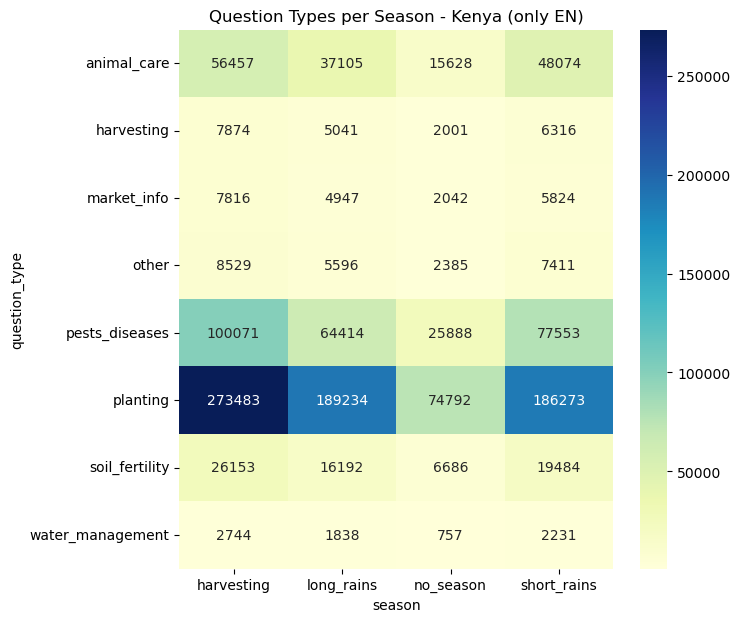

In [5]:
crosstab_result = pd.crosstab(df_ke['question_type'], df_ke['season'])

plt.figure(figsize=(7, 7))
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Question Types per Season - Kenya (only EN)")
plt.savefig("images/types_per_season_kenya.jpg", bbox_inches='tight')
plt.show()

## Question Types per Season - Uganda

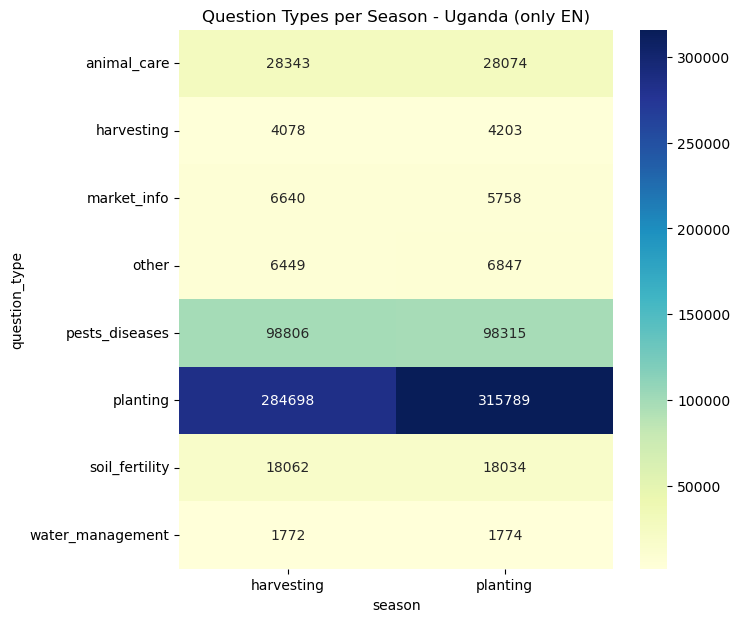

In [6]:
crosstab_result = pd.crosstab(df_ug['question_type'], df_ug['season'])

plt.figure(figsize=(7, 7))
sns.heatmap(crosstab_result, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Question Types per Season - Uganda (only EN)")
plt.savefig("images/types_per_season_uganda.jpg", bbox_inches='tight')
plt.show()

## Question types over time

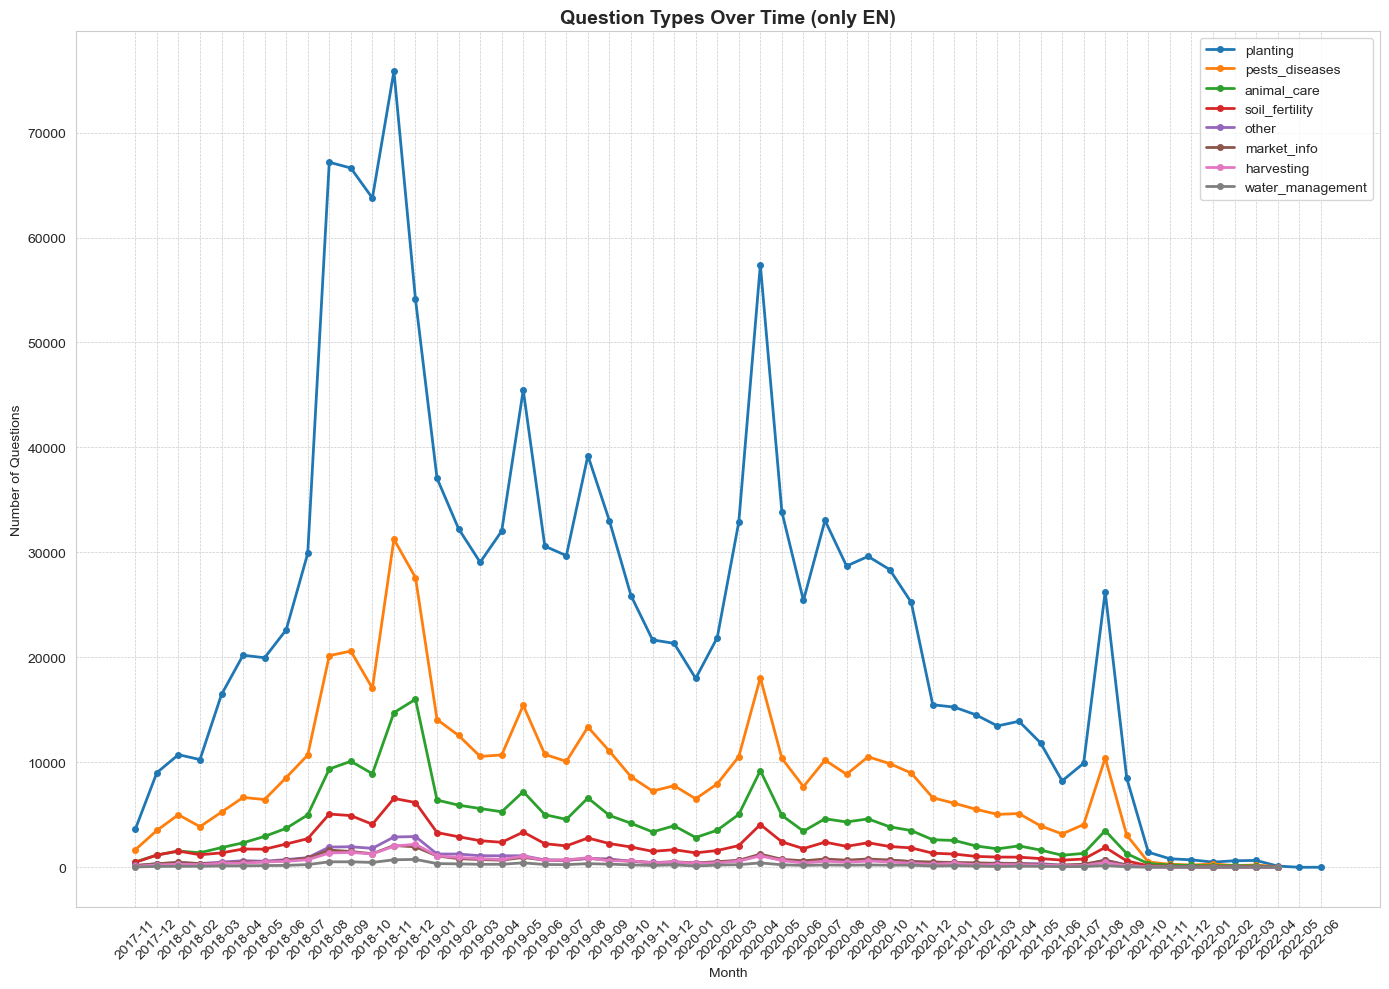

In [28]:
df['date'] = pd.to_datetime(df['date'], format='ISO8601')
df['month'] = df['date'].dt.to_period('M').astype(str)
monthly_counts = df.groupby(['month', 'question_type']).size().reset_index(name='count')

plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
qtypes = df['question_type'].value_counts().index.tolist()

for qtype in qtypes:
    type_data = monthly_counts[monthly_counts['question_type'] == qtype]
    plt.plot(type_data['month'], type_data['count'], marker='o', linewidth=2, markersize=4, label=qtype)

plt.title('Question Types Over Time (only EN)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("images/types_over_time.jpg", bbox_inches='tight')
plt.show()

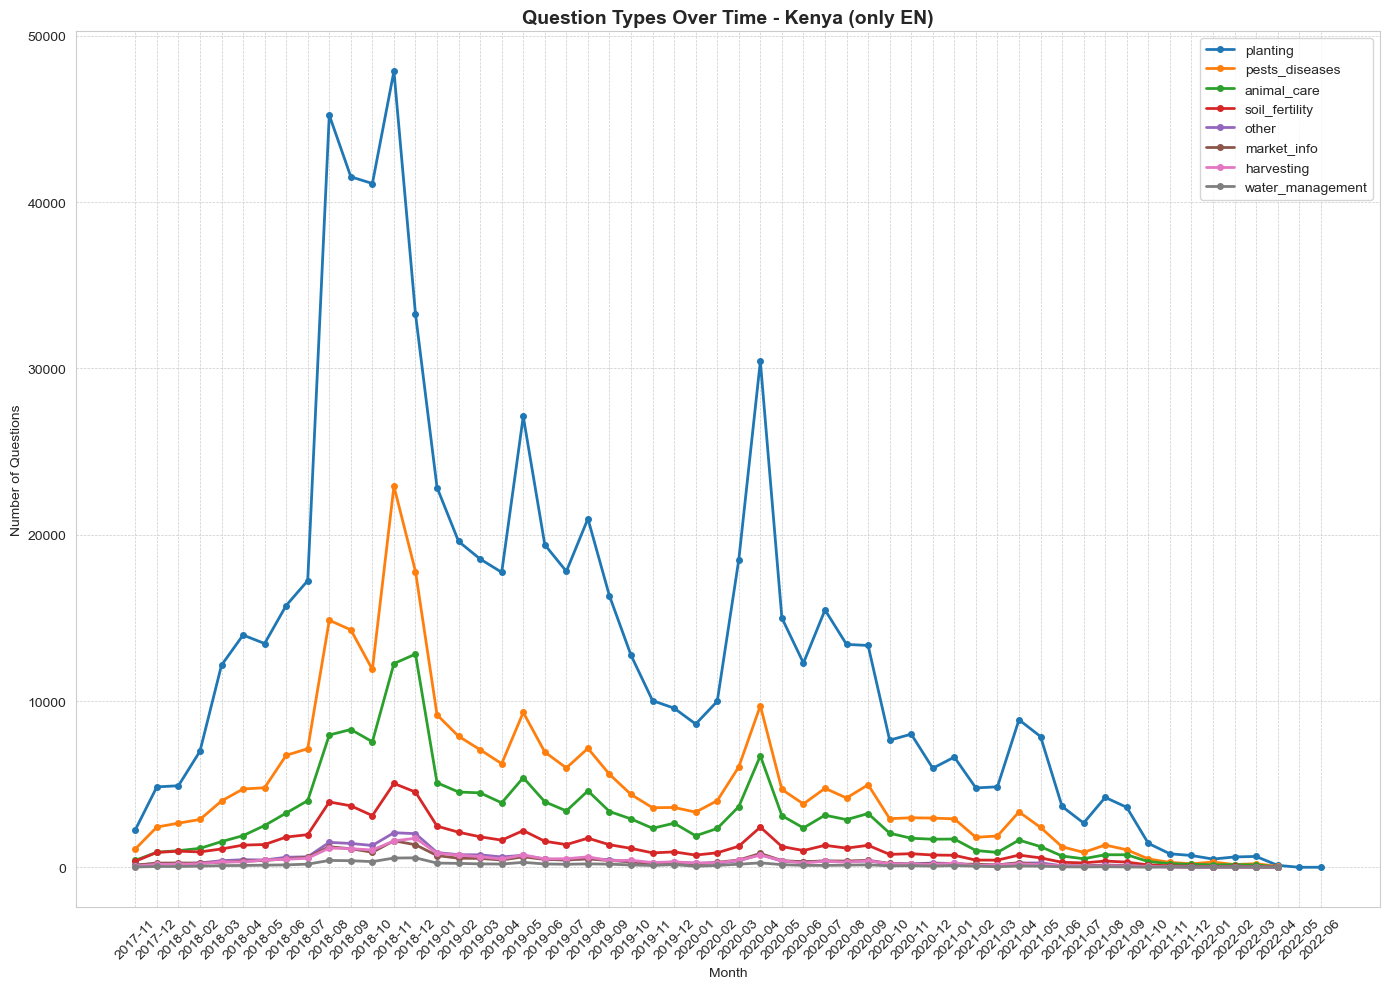

In [29]:
df_ke['date'] = pd.to_datetime(df_ke['date'], format='ISO8601')
df_ke['month'] = df_ke['date'].dt.to_period('M').astype(str)
monthly_counts = df_ke.groupby(['month', 'question_type']).size().reset_index(name='count')

plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
qtypes = df['question_type'].value_counts().index.tolist()

for qtype in qtypes:
    type_data = monthly_counts[monthly_counts['question_type'] == qtype]
    plt.plot(type_data['month'], type_data['count'], marker='o', linewidth=2, markersize=4, label=qtype)

plt.title('Question Types Over Time - Kenya (only EN)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("images/types_over_time_kenya.jpg", bbox_inches='tight')
plt.show()

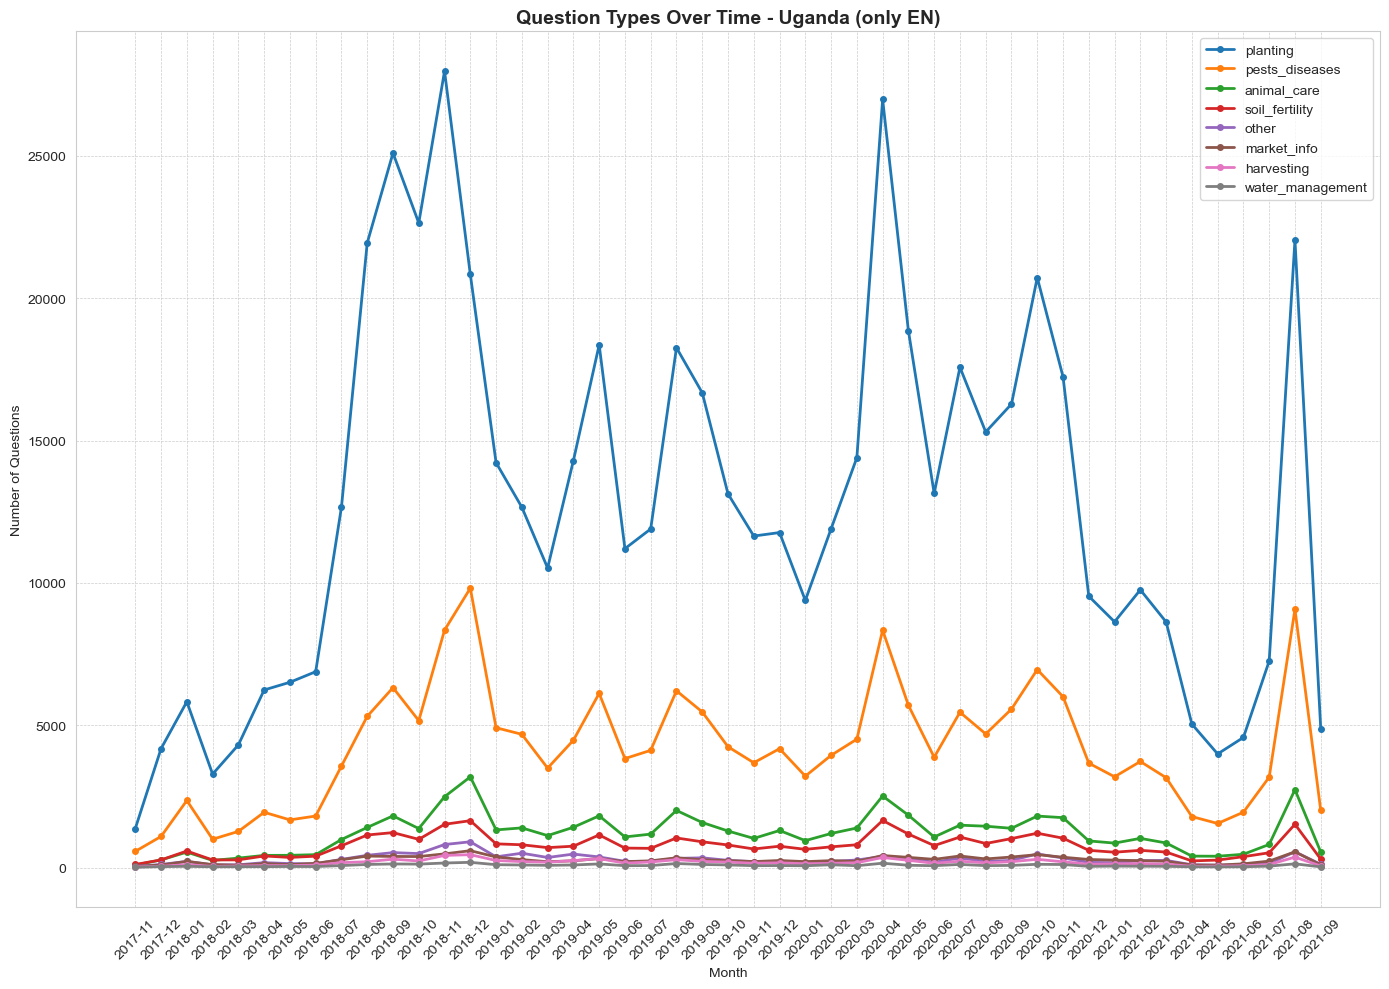

In [30]:
df_ug['date'] = pd.to_datetime(df_ug['date'], format='ISO8601')
df_ug['month'] = df_ug['date'].dt.to_period('M').astype(str)
monthly_counts = df_ug.groupby(['month', 'question_type']).size().reset_index(name='count')

plt.style.use('default')
sns.set_style("whitegrid")
plt.figure(figsize=(14, 10))
qtypes = df['question_type'].value_counts().index.tolist()

for qtype in qtypes:
    type_data = monthly_counts[monthly_counts['question_type'] == qtype]
    plt.plot(type_data['month'], type_data['count'], marker='o', linewidth=2, markersize=4, label=qtype)

plt.title('Question Types Over Time - Uganda (only EN)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Questions')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("images/types_over_time_uganda.jpg", bbox_inches='tight')
plt.show()